In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.5/749.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:

from zipfile import ZipFile
import os
# The data directory is currently hard-coded, if you want to train in different location you need to change it:
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
# then you need to re-import it
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import torch
import numpy as np
from PIL import Image  # to display images
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)
Setup complete. Using torch 2.2.1+cu121 on device (CPU)


# Load a model
The data directory is currently hard-coded, if you want to train in different location you need to change it:
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
then you need to re-import it

In [3]:
model_pose = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n classification model

100%|██████████| 6.51M/6.51M [00:00<00:00, 53.2MB/s]


# Let's see how can we train the model

In [4]:
model_pose.train(data='coco8-pose.yaml', epochs=10)  # train the model

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 334k/334k [00:00<00:00, 6.77MB/s]
Unzipping /content/datasets/coco8-pose.zip to /content/datasets/coco8-pose...: 100%|██████████| 27/27 [00:00<00:00, 2362.94file/s]

Dataset download success ✅ (1.4s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 12.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8-pose/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 122.10it/s]

train: New cache created: /content/datasets/coco8-pose/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco8-pose/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 462.54it/s]

val: New cache created: /content/datasets/coco8-pose/labels/val.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.083      1.971     0.3104      1.121      1.254          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all          4         14      0.926      0.898      0.907      0.668      0.846        0.5      0.535      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.052      1.833     0.3535     0.8587      1.258          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         14      0.927      0.914      0.907      0.661      0.847        0.5      0.535      0.348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.075       1.65     0.3043      1.084      1.185          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          4         14      0.927      0.908      0.907      0.671      0.847        0.5      0.535      0.339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.064      1.286      0.303      0.844      1.174          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4         14      0.865      0.857      0.907      0.677      0.797      0.561      0.589      0.343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9251      2.325     0.3933     0.9218      1.132          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         14       0.82      0.857      0.904      0.674       0.73       0.58      0.584      0.331



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.087      2.084     0.3218     0.8406      1.262          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          4         14      0.803      0.874      0.943      0.689      0.797      0.562       0.58       0.33



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.133      1.195     0.2866     0.7128      1.265          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         14      0.727      0.952      0.927      0.666      0.667      0.643      0.574      0.318



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.6504       1.22     0.3087     0.4865     0.9586          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all          4         14      0.717      0.905      0.924      0.669      0.675      0.643      0.572      0.312



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      0.876      2.598     0.3635     0.8376      1.239          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         14       0.71      0.873      0.924      0.665      0.685      0.643      0.572      0.314



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8486      1.979      0.322     0.8415      1.121          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14      0.845      0.779      0.924      0.665      0.692      0.642      0.572        0.3



10 epochs completed in 0.017 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.8MB

Validating runs/pose/train/weights/best.pt...
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


                   all          4         14      0.803      0.875      0.948      0.691      0.729      0.576      0.584      0.331
Speed: 2.4ms preprocess, 248.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/pose/train


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecc10fd09a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

# Use the model

In [5]:
results_pose=model_pose('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 476k/476k [00:00<00:00, 9.76MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 231.4ms
Speed: 4.9ms preprocess, 231.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


### Let's see what the "results" contain

In [6]:
results_pose

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[122, 148, 172],
         [120, 146, 170],
         [125, 153, 177],
         ...,
         [157, 170, 184],
         [158, 171, 185],
         [158, 171, 185]],
 
        [[127, 153, 177],
         [124, 150, 174],
         [127, 155, 179],
         ...,
         [158, 171, 185],
         [159, 172, 186],
         [159, 172, 186]],
 
        [[128, 154, 178],
         [126, 152, 176],
         [126, 154, 178],
         ...,
         [158, 171, 185],
         [158, 171, 185],
         [158, 171, 185]],
 
        ...,
 
        [[185, 185, 191],
         [182, 182, 188],
         [179, 179, 185],
         ...,
         [114, 107, 112],
         [115, 105, 111],
         [116, 106, 112]],
 
        [[157, 157, 163],
         [180, 180, 186],
         [185, 186,

In [7]:
results_pose[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9798, 0.8975, 0.9567, 0.4013, 0.7988, 0.9890, 0.9898, 0.9668, 0.9718, 0.9518, 0.9597, 0.9948, 0.9947, 0.9899, 0.9903, 0.9521, 0.9520],
        [0.2959, 0.3676, 0.0767, 0.4953, 0.0586, 0.7701, 0.3319, 0.7312, 0.1357, 0.6219, 0.1733, 0.7613, 0.5351, 0.8287, 0.6351, 0.7092, 0.5582],
        [0.9802, 0.9262, 0.9540, 0.6868, 0.8389, 0.9950, 0.9964, 0.9723, 0.9809, 0.9518, 0.9625, 0.9984, 0.9985, 0.9966, 0.9972, 0.9851, 0.9869],
        [0.0778, 0.0476, 0.0331, 0.0734, 0.0504, 0.3760, 0.1318, 0.4880, 0.1376, 0.5249, 0.2178, 0.3277, 0.1907, 0.2971, 0.1681, 0.1918, 0.1246]])
data: tensor([[[1.4317e+02, 4.4455e+02, 9.7976e-01],
         [1.4656e+02, 4.3548e+02, 8.9751e-01],
         [1.3147e+02, 4.3548e+02, 9.5669e-01],
         [0.0000e+00, 0.0000e+00, 4.0125e-01],
         [1.0213e+02, 4.4230e+02, 7.9876e-01],
         [1.6021e+02, 4.9639e+02, 9.8904e-01],
         [8.4825e+01, 4.9775e+02, 9.8982e-01],
         [1.

In [8]:
print(results_pose[0].keypoints.xy.shape)

torch.Size([4, 17, 2])


In [11]:
print(results_pose[0].keypoints.shape)

torch.Size([4, 17, 3])


## Let's display the results

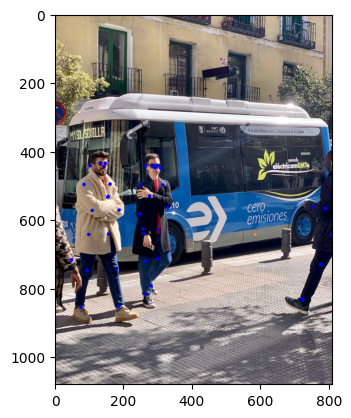

In [9]:
Instance=results_pose[0].keypoints.xy.shape[0]
Keypoints=results_pose[0].keypoints.xy.shape[1]
img_pose = cv2.imread("bus.jpg")
img_pose = cv2.cvtColor(img_pose, cv2.COLOR_BGR2RGB)

for i1 in range(Instance):
    for k1 in range(Keypoints):
        x=int(results_pose[0].keypoints.xy[i1,k1,0].detach().cpu().item())
        y=int(results_pose[0].keypoints.xy[i1,k1,1].detach().cpu().item())
        img_pose = cv2.circle(img_pose, (x,y), radius=5, color=(0, 0, 255), thickness=-1)

img_pose = Image.fromarray(img_pose)  # RGB PIL image
plt.imshow(img_pose)
img_pose.show()  # show image